<a href="https://colab.research.google.com/github/chandrakar-shubham/netflix-movies-and-tv-shows-clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing data into dataframe
path = '/content/drive/MyDrive/Capstone projects/Netflix movies and TV shows clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(path)

In [ ]:
#top 5 rows of df

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#bottom 5 rows of df

df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


Database contains movies an TV shows from 1925 to 2017 and most of the movies/tv shows are released in 2013-2014

In [ ]:
#checking summary of df

df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
#checking count of null items in df

df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Null value treatment

In [ ]:
# Treating null values

df.fillna('Not Specified',inplace=True)

In [ ]:
#checking count of null items in df

df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Feature engineering

In [ ]:
#checking type of content on type column

# most of the content is movies

df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [ ]:
#checking title on title column
df['title'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, Length: 7787, dtype: object>

In [ ]:
#checking director on director column
df['director'].value_counts()

Not Specified             2389
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
                          ... 
Andrew C. Erin               1
Vibhu Virender Puri          1
Lucien Jean-Baptiste         1
Jason Krawczyk               1
Sam Dunn                     1
Name: director, Length: 4050, dtype: int64

In [ ]:
#checking date addded column

df['date_added'].value_counts()

January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
October 12, 2014       1
March 22, 2020         1
March 31, 2013         1
December 12, 2019      1
January 11, 2020       1
Name: date_added, Length: 1566, dtype: int64

In [ ]:
#extracting year in which content was added from date added

df['year_added'] = df['date_added'].str[-4:]

In [ ]:
df['year_added']

0       2020
1       2016
2       2018
3       2017
4       2020
        ... 
7782    2020
7783    2019
7784    2020
7785    2020
7786    2020
Name: year_added, Length: 7787, dtype: object

In [ ]:
#checking release year column

df['release_year'].value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

In [ ]:
#checking rating column

df['rating'].value_counts()

TV-MA            2863
TV-14            1931
TV-PG             806
R                 665
PG-13             386
TV-Y              280
TV-Y7             271
PG                247
TV-G              194
NR                 84
G                  39
Not Specified       7
TV-Y7-FV            6
UR                  5
NC-17               3
Name: rating, dtype: int64

In [ ]:
#checking duration column

df['duration'].value_counts()

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
233 min         1
196 min         1
191 min         1
Name: duration, Length: 216, dtype: int64

#EDA on dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7787 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7787 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
 12  year_added    7787 non-null   object
dtypes: int64(1), object(12)
memory usage: 791.0+ KB


Distribution of duration of content

In [ ]:
df['duration'].value_counts

<bound method IndexOpsMixin.value_counts of 0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: duration, Length: 7787, dtype: object>

In [ ]:
df['duration'].value_counts()

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
233 min         1
196 min         1
191 min         1
Name: duration, Length: 216, dtype: int64

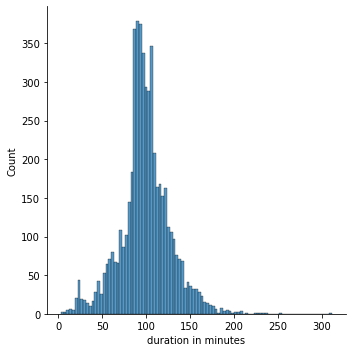

In [ ]:
duration_movies_df=df[df['duration'].str.contains("Season")==False]
duration_movies_df = duration_movies_df['duration'].str[0:-4].reset_index(name = 'duration in minutes').sort_values(by='duration in minutes')
duration_movies_df['duration in minutes']=duration_movies_df['duration in minutes'].astype(int)


sns.displot(duration_movies_df['duration in minutes'])

#px.histogram(duration_movies_df, x= duration_movies_df['duration in minutes'])

In [ ]:
duration_movies_df['duration in minutes']=duration_movies_df['duration in minutes'].astype(int)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

<Figure size 864x504 with 0 Axes>

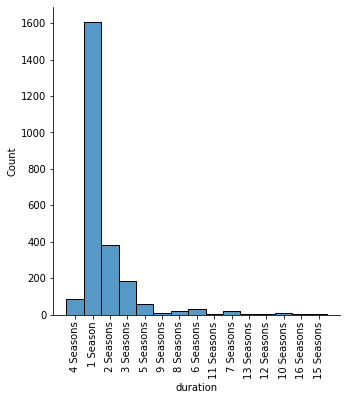

In [ ]:
duration_tv_df = df[df['duration'].str.contains("Season")==True]
plt.figure(figsize=(12,7))
sns.displot(duration_tv_df['duration'])
plt.xticks(rotation=90)


Top 5 director on Netflix

In [ ]:
director_name=pd.DataFrame()
director_name=df['director'].str.split(',',expand=True).stack()
director_name=director_name.to_frame()
director_name.columns=['Director']
directors=director_name.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='Not Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head()
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')
fig1.show()

Top 5 actors on Netflix

In [ ]:
cast_name=pd.DataFrame()
cast_name=df['cast'].str.split(',',expand=True).stack()
cast_name=cast_name.to_frame()
cast_name.columns=['Actor']
actors=cast_name.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='Not Specified']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop5=actors.head()
actorsTop5=actorsTop5.sort_values(by=['Total Content'])
fig2=px.bar(actorsTop5,x='Total Content',y='Actor', title='Top 5 Actors on Netflix')
fig2.show()

Genre

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7787 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7787 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
 12  year_added    7787 non-null   object
dtypes: int64(1), object(12)
memory usage: 791.0+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7787 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7787 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
 12  year_added    7787 non-null   object
dtypes: int64(1), object(12)
memory usage: 791.0+ KB


In [ ]:
from operator import contains
genre_name=pd.DataFrame()
genre_name=df['listed_in'].str.split(',',expand=True).stack()
genre_name=genre_name.to_frame()
genre_name.columns=['Genre']
genre_name=genre_name.groupby(['Genre']).size().reset_index(name='Total Content')
genre_name=genre_name[(genre_name.Genre !='Not Specified')]
genre_name = genre_name[genre_name['Genre'].str.contains("International Movies|International TV Shows|Independent Movies")==False]
genre_name=genre_name.sort_values(by=['Total Content'],ascending=False)
genreTop5=genre_name[:10]
genreTop5=genreTop5.sort_values(by=['Total Content'])
fig2=px.bar(genreTop5,x='Total Content',y='Genre', title='Top 10 Genre on Netflix')
fig2.show()

 Distribution of various ratings

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7787 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7787 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
 12  year_added    7787 non-null   object
dtypes: int64(1), object(12)
memory usage: 791.0+ KB


In [ ]:
rating_counts = df.groupby('rating').size().reset_index(name = 'counts')
px.pie(data_frame = rating_counts,values = 'counts',names='rating',title='Ratings of different contents on netflix')

Type of content and Day of release

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7787 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7787 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
 12  year_added    7787 non-null   object
dtypes: int64(1), object(12)
memory usage: 791.0+ KB


In [ ]:
df1 = df[['type','release_year']]
df2 = df1.groupby(['type','release_year']).size().reset_index(name='Total Content').rename(columns={'release_year':'Release Year'})
df2 = df2[df2['Release Year']>2010]

In [ ]:
df2

,type,Release Year,Total Content
61,Movie,2011,127
62,Movie,2012,158
63,Movie,2013,202
64,Movie,2014,244
65,Movie,2015,382
66,Movie,2016,642
67,Movie,2017,744
68,Movie,2018,734
69,Movie,2019,582
70,Movie,2020,411


Text(0.5, 1.0, 'Type of content released after 2010')

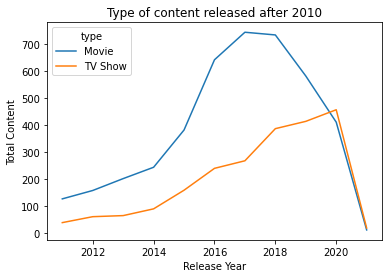

In [ ]:
#Visualising type of content released after 2010 on netflix

sns.lineplot(x=df2['Release Year'],y=df2['Total Content'],hue=df2['type'])
plt.title('Type of content released after 2010')

Sentiment analysis of contents in netflix

In [ ]:
# importing textblob for sentiment analysis

from textblob import TextBlob

dfx =df[['release_year','description']]
dfx = dfx.rename(columns={'release_year':'Release Year','description':'Description'})

In [ ]:
#creating sentiment series after analysing description

for index,row in dfx.iterrows():
    z=row['Description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent

In [ ]:
#calculating release year and total content with sentiment after 2010

dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]

In [ ]:
#visulaisation year,total content with type of sentiment

px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")

Type of content year added since

In [ ]:
dfy = df.groupby(['year_added','type']).size().reset_index(name = 'counts')

In [ ]:
px.bar(dfy, x="year_added", y="counts", color="type", title="Total content added since 2008")

In [ ]:
px.line(dfy, x="year_added", y="counts", color="type", title="Type of content added since 2008")

Actor acted in highest no of movies

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

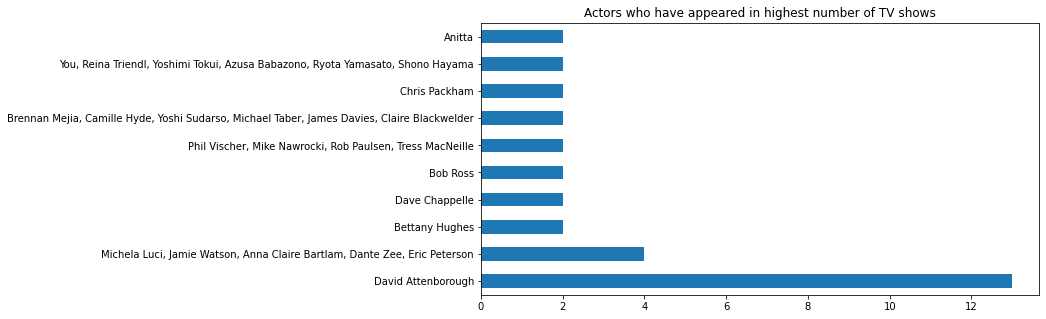

In [ ]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Not Specified') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

Country and type of content

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,text
0,s1,TV Show,3%,Not Specified,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016,"Dramas, International Moviesdevast earthquak h..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2018,"Horror Movies, International Moviesarmi recrui..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,2017,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group student becom cardcount expert...,2020,Dramasbrilliant group student becom cardcount ...


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,text
0,s1,TV Show,3%,Not Specified,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016,"Dramas, International Moviesdevast earthquak h..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2018,"Horror Movies, International Moviesarmi recrui..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,2017,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group student becom cardcount expert...,2020,Dramasbrilliant group student becom cardcount ...


In [ ]:
df_cm = df[['country','type']]

In [ ]:
pd.set_option('display.max_rows', 20)

In [ ]:
df_country_movies = df_cm[df_cm['type']=='Movie']

In [ ]:
from operator import contains
con_name=pd.DataFrame()
con_name=df_country_movies['country'].str.split(',',expand=True).stack()
con_name=con_name.to_frame()
con_name.columns=['country']
con_name=con_name.groupby(['country']).size().reset_index(name='Total Content')
con_name=con_name[(con_name.country !='Not Specified')]
con_name = con_name[con_name['country'].str.contains("|".join(df_cm))==False]
con_name=con_name.sort_values(by=['Total Content'],ascending=False)
con_name10=con_name[:10]
con_name10=con_name10.sort_values(by=['Total Content'])
fig2=px.bar(con_name10,x='Total Content',y='country', title='Top 10 country having movie title on Netflix')
fig2.show()

Top 10 countries having most number of tv shows on Netflix

In [ ]:
df_country_tv = df_cm[df_cm['type']=='TV Show']

In [ ]:
from operator import contains
con_name=pd.DataFrame()
con_name=df_country_tv['country'].str.split(',',expand=True).stack()
con_name=con_name.to_frame()
con_name.columns=['country']
con_name=con_name.groupby(['country']).size().reset_index(name='Total Content')
con_name=con_name[(con_name.country !='Not Specified')]
con_name = con_name[con_name['country'].str.contains("|".join(df_cm))==False]
con_name=con_name.sort_values(by=['Total Content'],ascending=False)
con_name5=con_name[:10]
con_name5=con_name5.sort_values(by=['Total Content'])
fig2=px.bar(con_name5,x='Total Content',y='country', title='Top 10 country having most number of TV shows on Netflix')
fig2.show()

#Data preparation for clustering

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7787 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7787 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
 12  year_added    7787 non-null   object
dtypes: int64(1), object(12)
memory usage: 791.0+ KB


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Not Specified,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


#Remove Puntucation

In [ ]:
df['description'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
df['description'] = df['description'].apply(remove_punctuation)
#df['description'].head(10)

In [ ]:
df['description'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

#Removing Stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


Function to remove Stopwords

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
df['description'] = df['description'].apply(stopwords)
df['description'].head(10)

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
5    genetics professor experiments treatment comat...
6    awful accident couple admitted grisly hospital...
7    one high school students attacks dedicated tea...
8    doctor goes missing psychiatrist wife treats b...
9    architect wife move castle slated become luxur...
Name: description, dtype: object

Word cloud of description

In [ ]:
from wordcloud import WordCloud, STOPWORDS

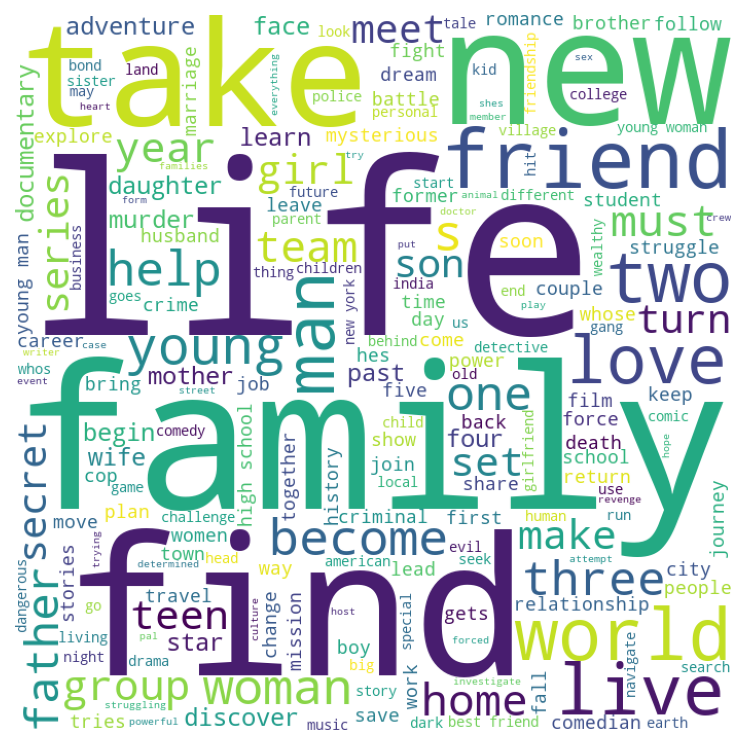

In [ ]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

Word cloud genre

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7787 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7787 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
 12  year_added    7787 non-null   object
dtypes: int64(1), object(12)
memory usage: 791.0+ KB


In [ ]:
genre_movies = df[df['type']=='Movie']
genre_movies
genre_tv = df[df['type']=='TV Show']
genre_tv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Not Specified,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,2020
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",genetics professor experiments treatment comat...,2017
11,s12,TV Show,1983,Not Specified,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",dark althistory thriller naïve law student wor...,2018
12,s13,TV Show,1994,Diego Enrique Osorno,Not Specified,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",archival video new interviews examine mexican ...,2019
16,s17,TV Show,Feb-09,Not Specified,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Not Specified,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas",psychology professor faces alzheimers daughter...,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,Not Specified,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",strongwilled middleclass kashaf carefree wealt...,2016
7775,s7776,TV Show,Zoids Wild,Not Specified,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",quest freedom legendary treasure begins cheerf...,2020
7777,s7778,TV Show,Zombie Dumb,Not Specified,Not Specified,Not Specified,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",living alone spooky town young girl befriends ...,2019
7779,s7780,TV Show,Zona Rosa,Not Specified,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",assortment talent takes stage night honest sta...,2019


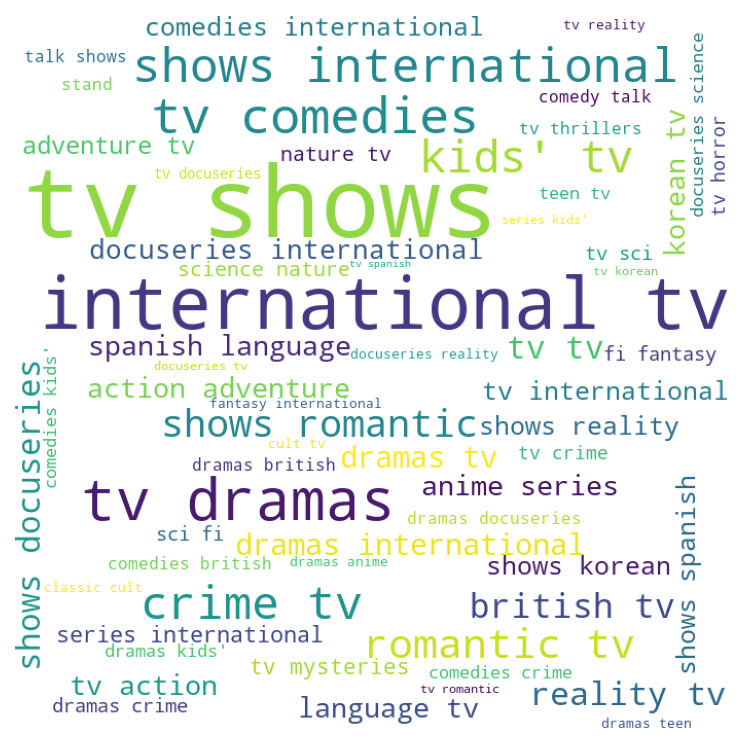

In [ ]:
# Building a wordcloud for the genre descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in genre_tv.listed_in.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

#Top words before stemming

Collect Vocalbulary count

In [ ]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
type(count_vectorizer.vocabulary_.items())

dict_items

In [ ]:
# make dictionary map
len(count_vectorizer.vocabulary_.items())

19608

In [ ]:
#total no of features
len(count_vectorizer.get_feature_names_out())

19608

Store the vocab and counts in a pandas dataframe

In [ ]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [ ]:
vocab_bef_stem.sort_values(ascending=False)

şeref        19607
ōarai        19606
łukasz       19605
überelite    19604
über         19603
             ...  
1000             4
100              3
10               2
009              1
007              0
Length: 19608, dtype: int64

Bar plot of top words before stemming

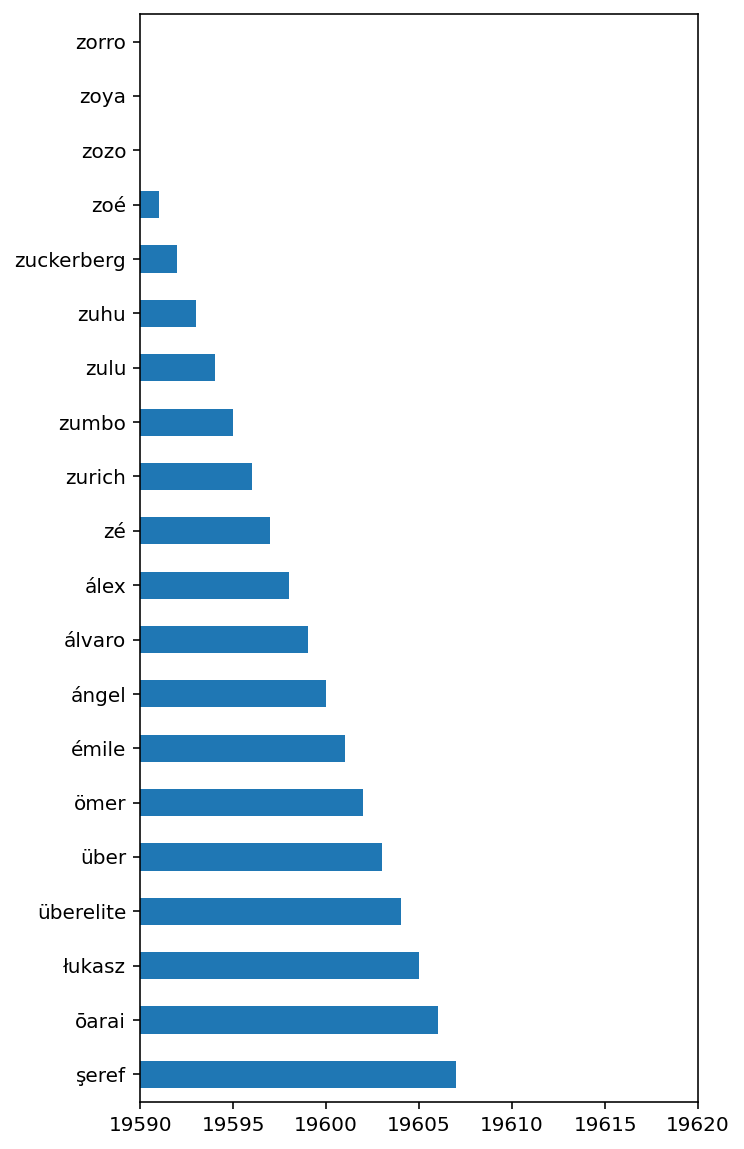

In [ ]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (19590, 19620))

In [ ]:
#vocab_bef_stem[3000:3050]

Stemming operations

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
df['description'] = df['description'].apply(stemming)
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Not Specified,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group student becom cardcount expert...,2020
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",genet professor experi treatment comatos siste...,2017
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies",aw accid coupl admit grisli hospit separ must ...,2020
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,one high school student attack dedic teacher t...,2019
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies",doctor goe miss psychiatrist wife treat bizarr...,2019
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",architect wife move castl slate becom luxuri h...,2017


Top words after stemming operation

In [ ]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

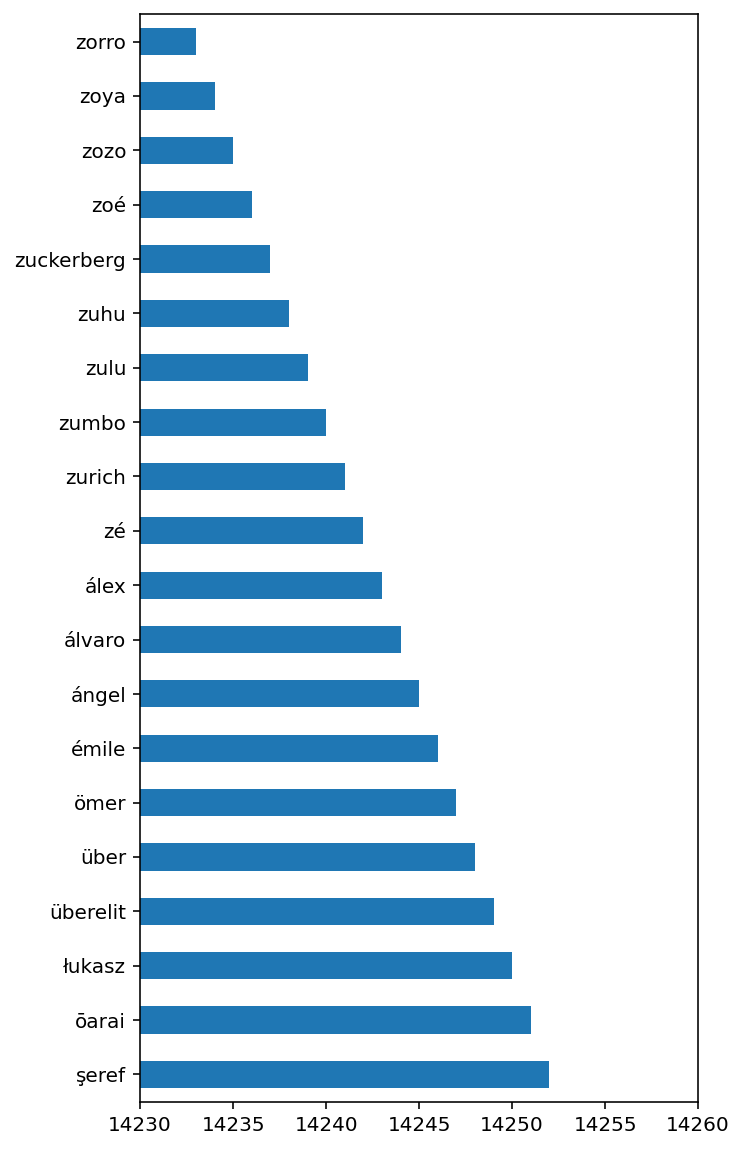

In [ ]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (14230, 14260))

Checking top words in description of content

In [ ]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

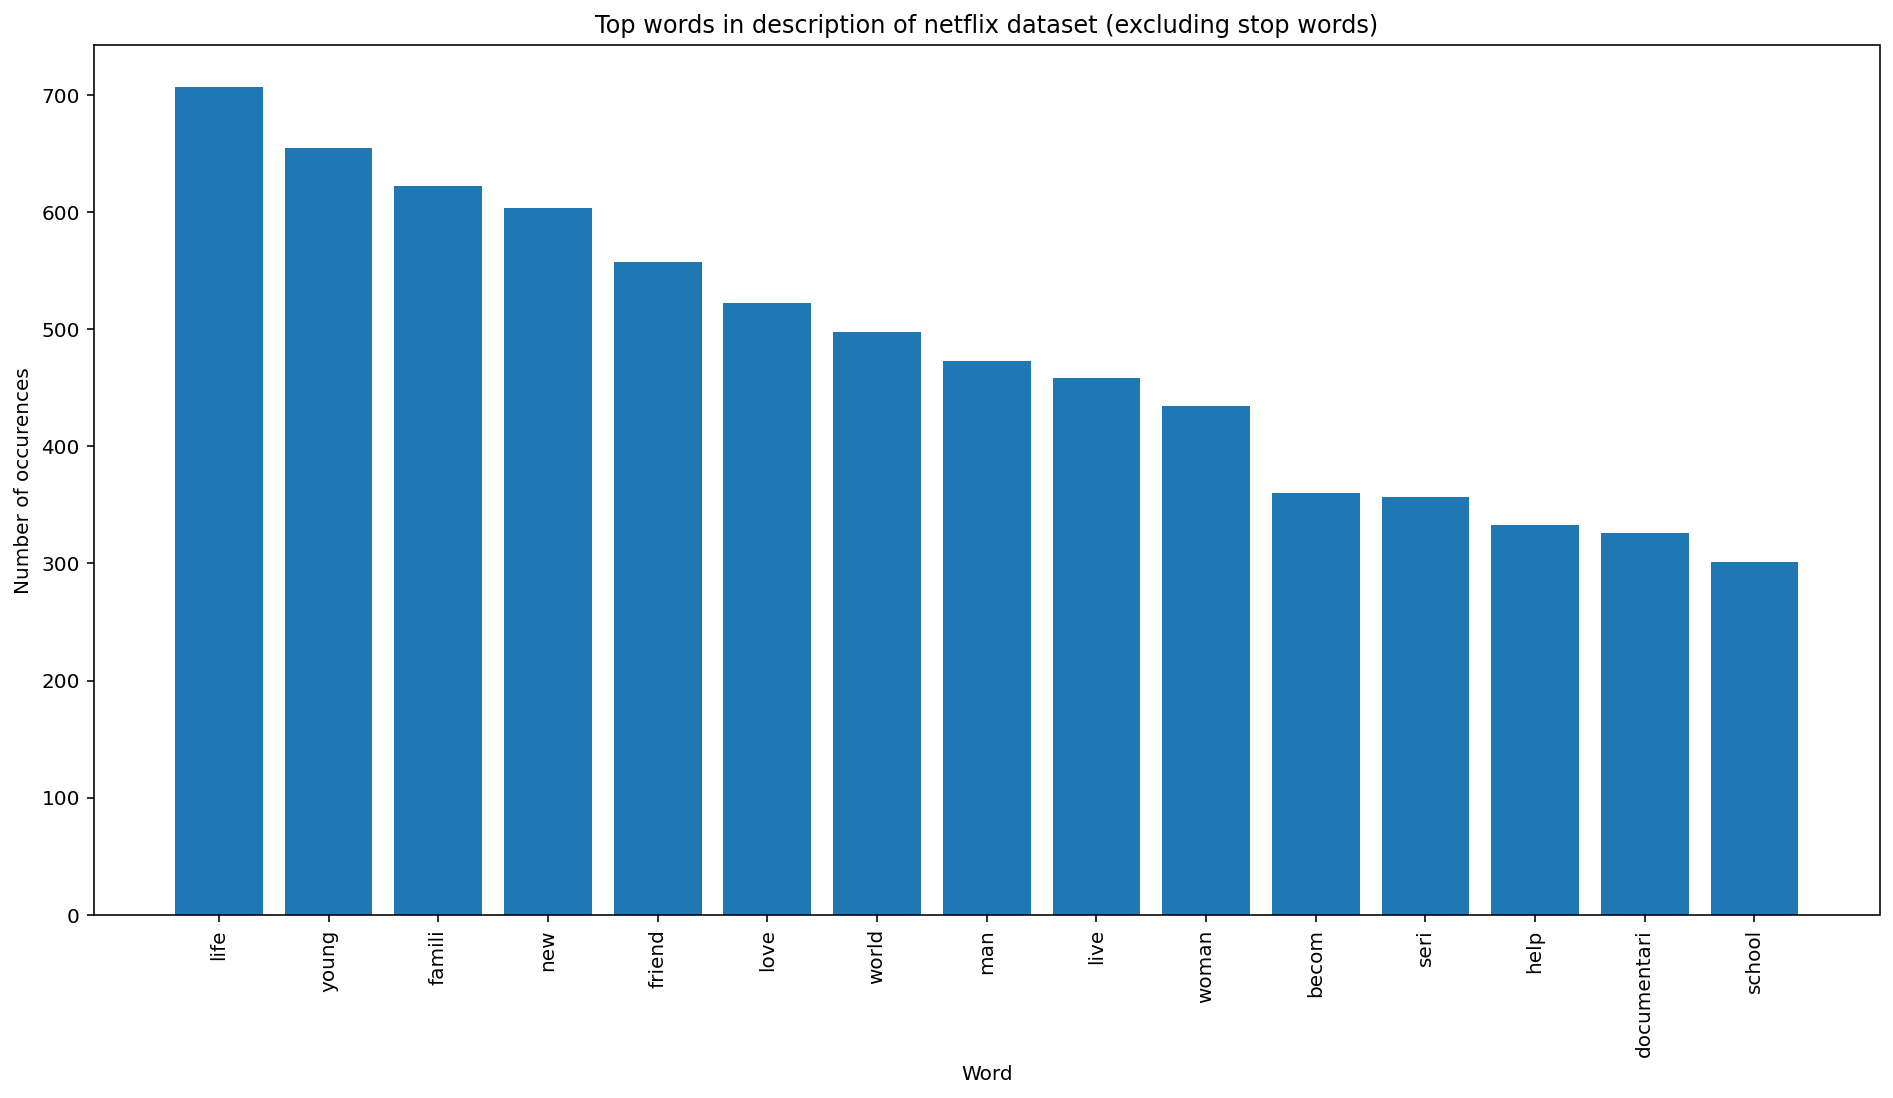

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['description'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in description of netflix dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

#Topic modelling

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Not Specified,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group student becom cardcount expert...,2020


In [ ]:
df['text'] = df['listed_in'] + df['description']

Preprocessing

In [ ]:
small_count_vectorizer = CountVectorizer(stop_words='english')
#small_text_sample = df['text'].sample(n=7500).values
small_text_sample = df['text']
print('Headline before vectorization: {}'.format(small_text_sample[7000]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n{}'.format(small_document_term_matrix[7000]))

Headline before vectorization: Children & Family Movies, Comediesfour sibl horribl selfish parent hatch plan get rid good form perfect imperfect famili
Headline after vectorization: 
  (0, 10125)	1
  (0, 6139)	1
  (0, 6714)	1
  (0, 13138)	1
  (0, 12824)	1
  (0, 2481)	1
  (0, 6141)	1
  (0, 14077)	1
  (0, 7156)	1
  (0, 12975)	1
  (0, 15279)	1
  (0, 2926)	1
  (0, 7823)	1
  (0, 7519)	1
  (0, 14612)	1
  (0, 8074)	1


In [ ]:
small_document_term_matrix

<7787x18672 sparse matrix of type '<class 'numpy.int64'>'
	with 126953 stored elements in Compressed Sparse Row format>

In [ ]:
#convert to dense matrix
X = np.array(small_document_term_matrix.todense())

In [ ]:
X.shape

(7787, 18672)

In [ ]:
#X[2196].sum()

In [ ]:
X[1560].sum()

20

LDA

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


%matplotlib inline

In [ ]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(2,7))} #K is hyperparameter here

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(small_document_term_matrix)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(small_document_term_matrix))

Best LDA model's params {'n_components': 2}
Best log likelihood Score for the LDA model -242625.54658807776
LDA model Perplexity on train data 3355.1382527834458


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=15d534c58218dcccfe6c3cc5f2addb7e1872d4744554bed0bb109f2b71ce511e
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=06d7b1d4a338d78d1936606a528ebf31d73fbfd40a9c2fe33a1963cfd7b4151a
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyLDAvis sklearn


In [ ]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [ ]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, small_document_term_matrix,small_count_vectorizer,mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming o

PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
0     -60.312317  141.369629       1        1  51.787261
1      60.312561 -141.369141       2        1  48.212739, topic_info=              Term         Freq        Total Category  logprob  loglift
17257           tv  3938.000000  3938.000000  Default  30.0000  30.0000
14867        shows  1810.000000  1810.000000  Default  29.0000  29.0000
389         action   794.000000   794.000000  Default  28.0000  28.0000
3825         crime   522.000000   522.000000  Default  27.0000  27.0000
8134   independent   595.000000   595.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
1446         becom   161.365606   312.711903   Topic2  -5.9706   0.0679
6498            fi   149.534644   258.727890   Topic2  -6.0468   0.1813
14490          sci   149.534498   258.727887   Topic2  -6.0468   0.1813
7612          help   142.365268   283.723918   Topic2  -6.0959   0.0399
15932        stori   139.595147   255.928055   Topic2  -6.1155   0.1234

[182 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
389        1  0.951122     action
389        2  0.049066     action
429        1  0.040394      adopt
429        2  0.969448      adopt
446        1  0.955442  adventure
...      ...       ...        ...
18446      2  0.506948      world
18535      1  0.676144       year
18535      2  0.321288       year
18571      1  0.307569      young
18571      2  0.692030      young

[251 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

# K-means clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Visualise clusters

Text(0, 0.5, 'WCSS')

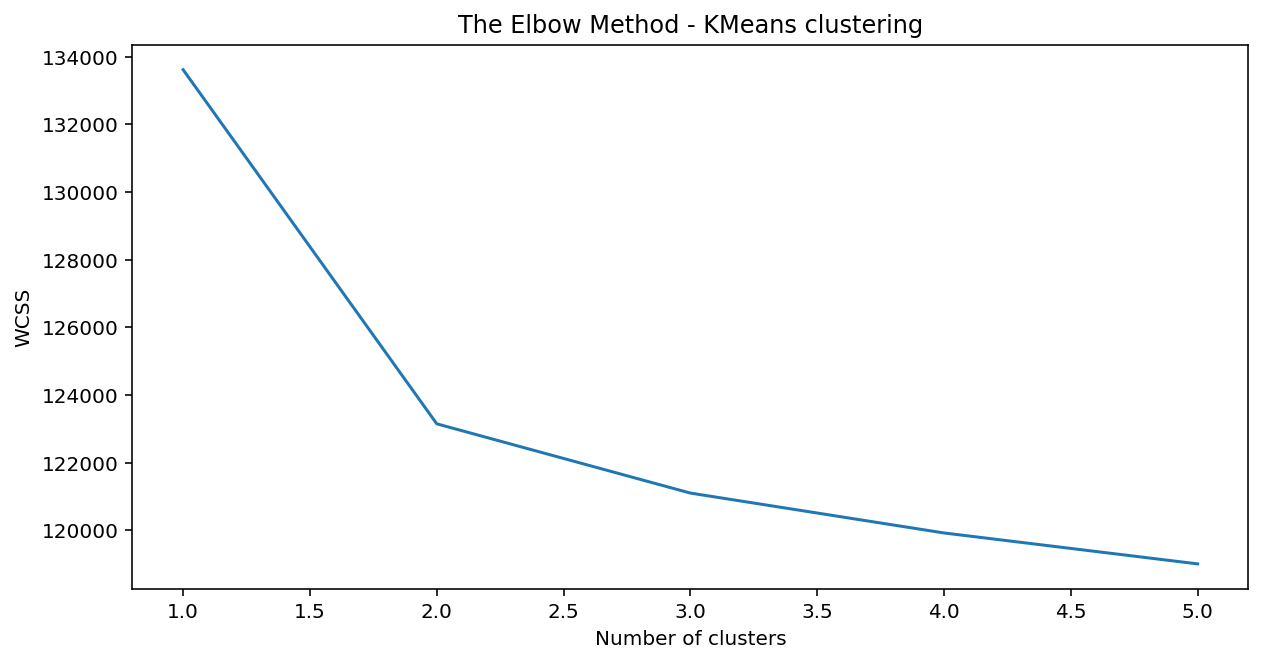

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,6):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33) #init='k-means++'
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,6)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

             We can see that optimal no of cluster is 3

Silhoutte score for K-Means Algorithm

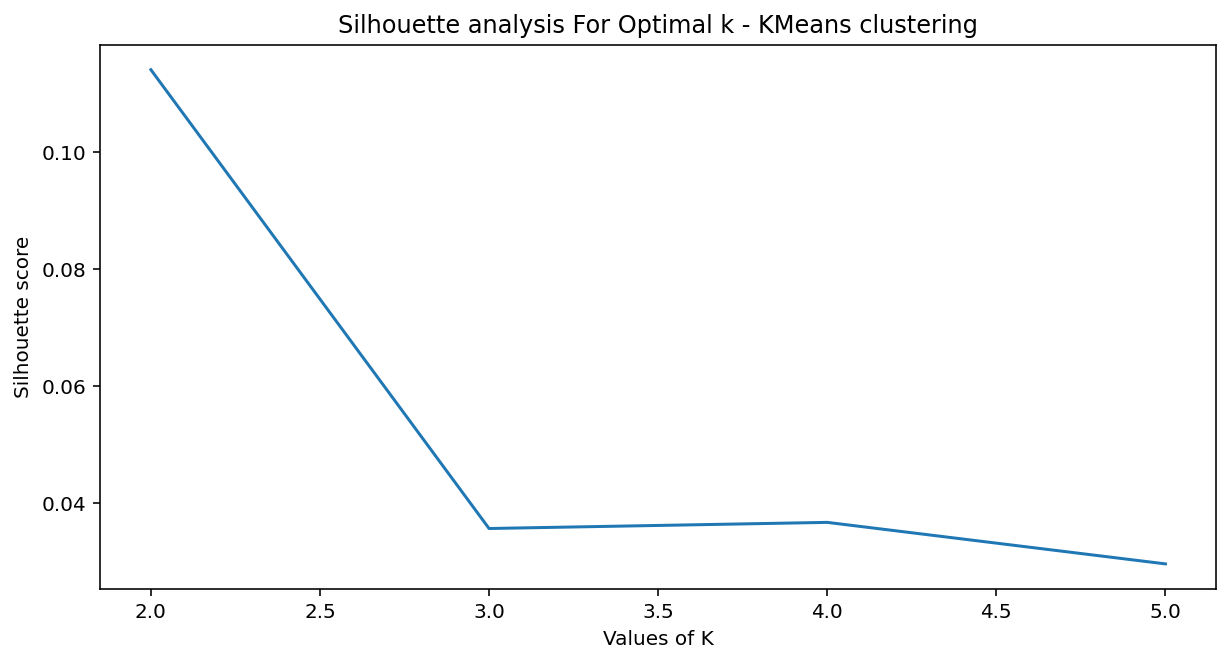

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score


# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,6)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

          We see sihouette score is maximised at k=2. We will take 3 clusters 

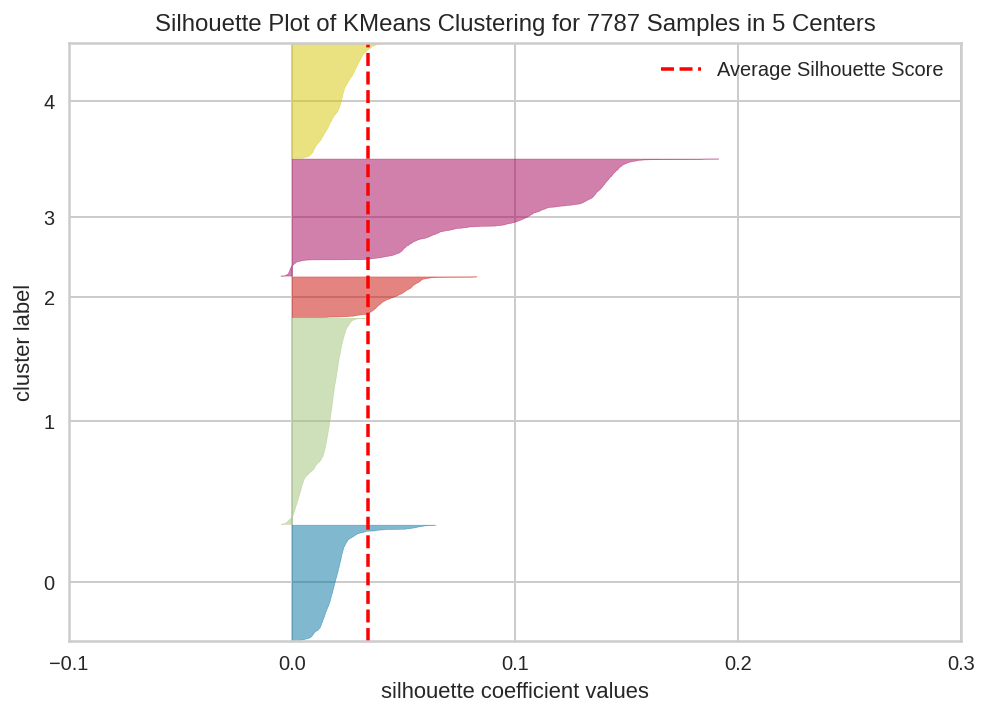

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Hierarchical clustering

It can be seen that dendogram is pointing out that optimum number of cluster is 8

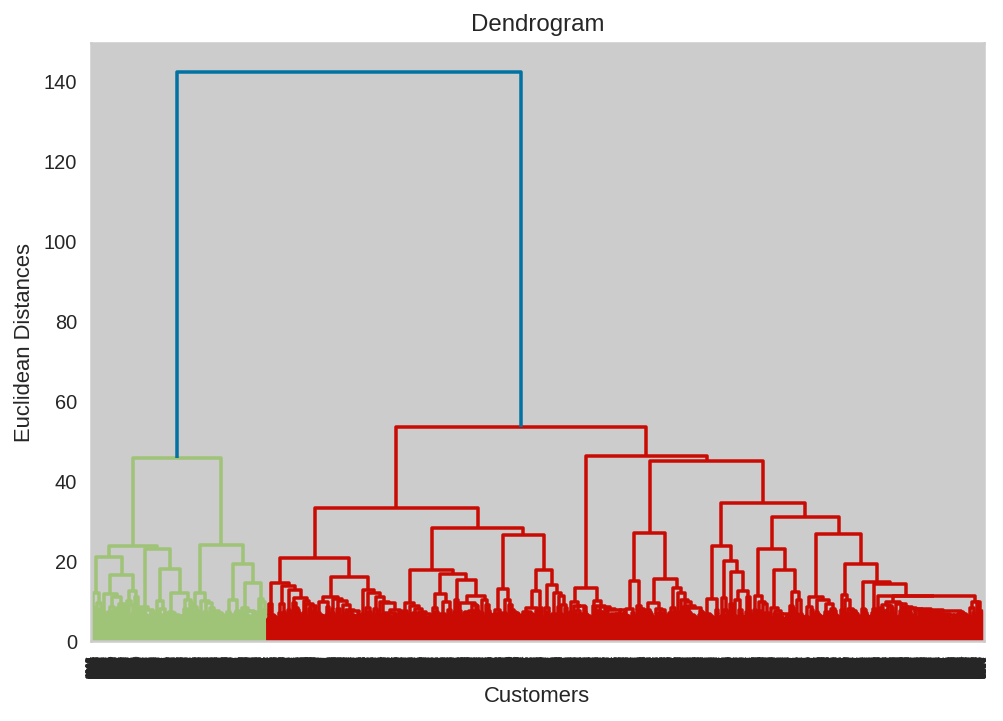

<Figure size 1080x864 with 0 Axes>

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.figure(figsize=(15, 12))
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)